# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
# Load the data from CSV file into a dataframe
colnames = ["ID" , "ClumpThickness" , "Cell Size" , "Cell Shape" , "Marginal Adhesion" , "Single Epithelial Cell Size" , "Bare Nuclei" , "Normal Nucleoli" , "Bland Chromatin" , "Mitoses" , "Class" ]

BCData_df = pd.read_csv("breast-cancer-wisconsin-data.csv", names = colnames , skiprows = 1)
BCData_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
BCData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
BCData_df.shape

(699, 11)

In [6]:
BCData_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
BCData_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
BCData_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

BCData_df[~BCData_df.applymap(np.isreal).all(1)]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
BCData_df[BCData_df['Bare Nuclei']=='?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [11]:
len(BCData_df[BCData_df['Bare Nuclei']=='?'])

16

In [12]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

replaceBareNuclei=BCData_df.describe(include='all')
replaceBareNuclei
BCData_df[BCData_df['Bare Nuclei']=='1'].shape[0]
replaceBareNuclei['Bare Nuclei'].top
BCData_df.replace('?',replaceBareNuclei['Bare Nuclei'].top,inplace=True)

In [13]:
len(BCData_df[BCData_df['Bare Nuclei']=='?'])

0

In [14]:
BCData_df['Bare Nuclei']=BCData_df['Bare Nuclei'].astype(int)
BCData_df.duplicated().sum()

9

In [15]:
#BCData_df.drop_duplicates(keep=False, inplace=True)
BCData_df.drop_duplicates(inplace=True)
BCData_df.shape

(690, 11)

In [16]:
BCData_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,690.0,1.073826e+06,619609.221048,61634.0,874484.5,1171752.5,1238450.5,13454352.0
ClumpThickness,690.0,4.428986e+00,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333e+00,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348e+00,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536e+00,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043e+00,2.200964,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,690.0,3.482609e+00,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,3.436232e+00,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507e+00,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203e+00,1.724230,1.0,1.0,1.0,1.0,10.0


In [17]:
BCData_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int32
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int32(1), int64(10)
memory usage: 62.0 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


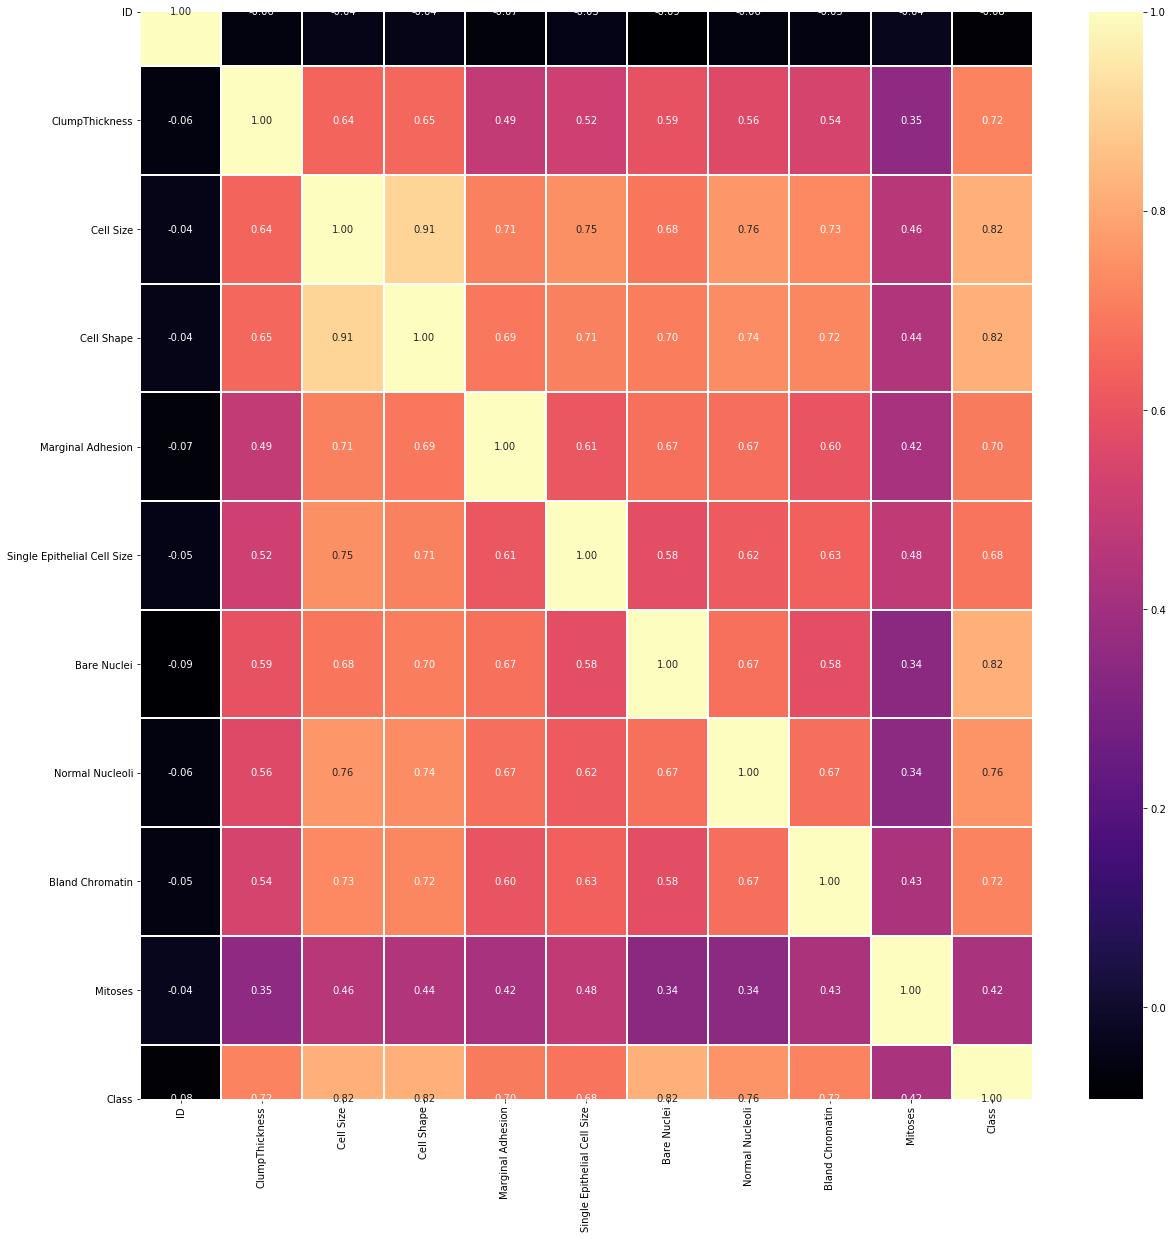

In [18]:
# Check for correlation of variable
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(BCData_df.corr(), annot=True, fmt='.2f', linewidths=1, ax=ax, cmap="magma")
plt.show()

In [19]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [20]:
#Let us check for pair plots
# Multivariate Analysis - pairplot to check all columns relations 
sns.pairplot(BCData_df, hue='Class', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=10)
plt.show()

C:\Users\vybreddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vybreddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [21]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [22]:
# Get the features and labels
features = BCData_df.drop('Class', axis=1)
features= features.drop('ID', axis=1)
labels = BCData_df['Class']

In [23]:
features

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [24]:
labels

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 690, dtype: int64

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

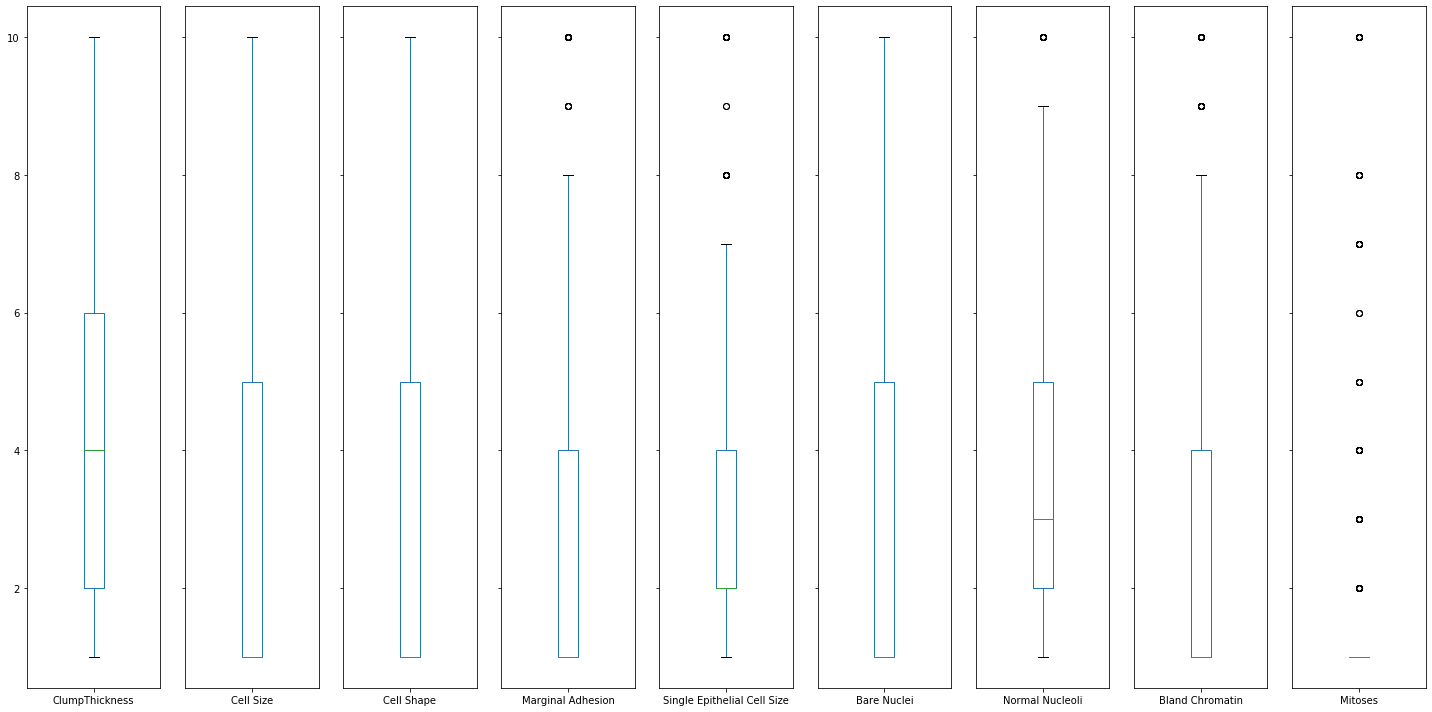

In [25]:
# We could see most of the outliers are now removed.
# Boxplot for viewing some statical values of all columns

#BCData_df.boxplot(figsize=(20,3),column=["ClumpThickness" , "Cell Size" , "Cell Shape" , "Marginal Adhesion" ])
features.plot(kind='box', subplots=True, sharex=True, sharey=True, figsize=(20, 10))
plt.tight_layout()
plt.show()

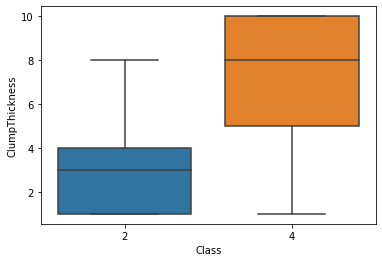

In [26]:
sns.boxplot(x='Class', y='ClumpThickness' , data=BCData_df)
plt.show()

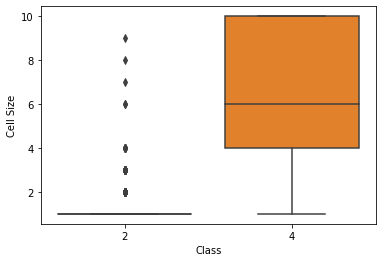

In [27]:
sns.boxplot(x='Class', y='Cell Size' , data=BCData_df)
plt.show()

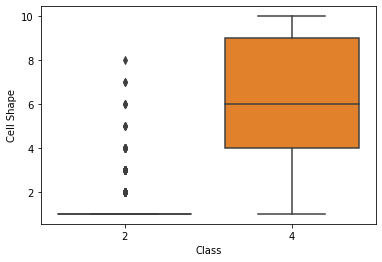

In [28]:
sns.boxplot(x='Class', y='Cell Shape' , data=BCData_df)
plt.show()

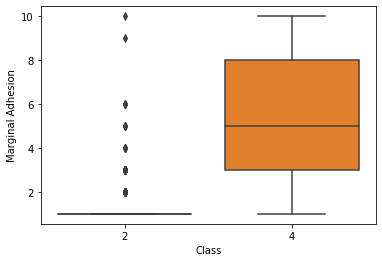

In [29]:
sns.boxplot(x='Class', y='Marginal Adhesion' , data=BCData_df)
plt.show()

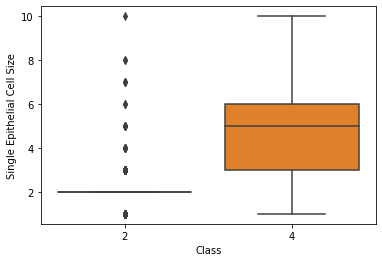

In [30]:
sns.boxplot(x='Class', y='Single Epithelial Cell Size' , data=BCData_df)
plt.show()

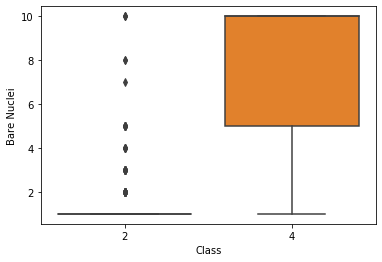

In [31]:
sns.boxplot(x='Class', y='Bare Nuclei' , data=BCData_df)
plt.show()

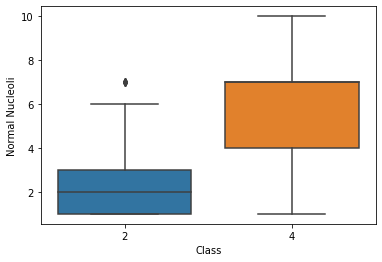

In [32]:
sns.boxplot(x='Class', y='Normal Nucleoli' , data=BCData_df)
plt.show()

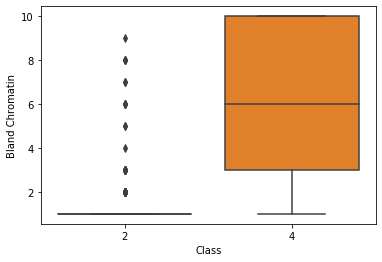

In [33]:
sns.boxplot(x='Class', y='Bland Chromatin' , data=BCData_df)
plt.show()

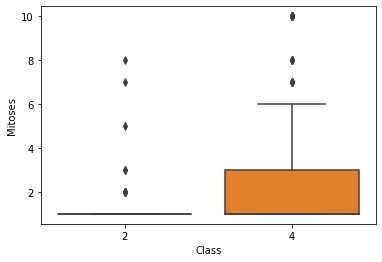

In [34]:
sns.boxplot(x='Class', y='Mitoses' , data=BCData_df)
plt.show()

In [35]:
pd.crosstab(BCData_df['Marginal Adhesion'],BCData_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [36]:
pd.crosstab(BCData_df['Marginal Adhesion'],BCData_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [37]:
pd.crosstab(BCData_df['Bare Nuclei'],BCData_df['Class'])

Class,2,4
Bare Nuclei,,
1,395,17
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,18
9,0,9


In [38]:
pd.crosstab(BCData_df['Normal Nucleoli'],BCData_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [39]:
pd.crosstab(BCData_df['Bland Chromatin'],BCData_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [40]:
pd.crosstab(BCData_df['Mitoses'],BCData_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [50]:
BCData_df['Marginal Adhesion']=np.where(BCData_df['Marginal Adhesion']>4,4,BCData_df['Marginal Adhesion'])
BCData_df['Single Epithelial Cell Size']=np.where(BCData_df['Single Epithelial Cell Size']>4,4,BCData_df['Single Epithelial Cell Size'])
BCData_df['Bare Nuclei']=np.where(BCData_df['Bare Nuclei']>5,5,BCData_df['Bare Nuclei'])
BCData_df['Normal Nucleoli']=np.where(BCData_df['Normal Nucleoli']>4,4,BCData_df['Normal Nucleoli'])
BCData_df['Bland Chromatin']=np.where(BCData_df['Bland Chromatin']>4,4,BCData_df['Bland Chromatin'])
BCData_df['Mitoses']=np.where(BCData_df['Mitoses']>1,1,BCData_df['Mitoses'])

In [84]:
features['Marginal Adhesion']=np.where(BCData_df['Marginal Adhesion']>4,4,BCData_df['Marginal Adhesion'])
features['Single Epithelial Cell Size']=np.where(BCData_df['Single Epithelial Cell Size']>4,4,BCData_df['Single Epithelial Cell Size'])
features['Bare Nuclei']=np.where(BCData_df['Bare Nuclei']>5,5,BCData_df['Bare Nuclei'])
features['Normal Nucleoli']=np.where(BCData_df['Normal Nucleoli']>4,4,BCData_df['Normal Nucleoli'])
features['Bland Chromatin']=np.where(BCData_df['Bland Chromatin']>4,4,BCData_df['Bland Chromatin'])
features['Mitoses']=np.where(BCData_df['Mitoses']>1,1,BCData_df['Mitoses'])

In [85]:
features

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,5,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,4,3,4,4,1
697,4,8,6,4,3,4,4,4,1


# Q6 Create a covariance matrix for identifying Principal components

In [86]:
# PCA
# Step 1 - Create covariance matrix
#features = BCData_df.drop('Class', axis=1)
#features= features.drop('ID', axis=1)
#labels = BCData_df['Class']
cov_matrix=np.cov(features.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[7.93762016 5.51311079 5.45212343 2.02134999 1.58362256 3.07801266
  1.74823416 2.10597589 0.        ]
 [5.51311079 9.25650701 8.15558781 2.84857281 2.26463474 3.84141268
  2.31165941 2.88911466 0.        ]
 [5.45212343 8.15558781 8.76659936 2.70385562 2.13964788 3.80041017
  2.21436865 2.78168739 0.        ]
 [2.02134999 2.84857281 2.70385562 1.68629183 0.86946005 1.63320082
  0.8906628  1.10828548 0.        ]
 [1.58362256 2.26463474 2.13964788 0.86946005 0.92942933 1.21667613
  0.69569424 0.91140279 0.        ]
 [3.07801266 3.84141268 3.80041017 1.63320082 1.21667613 3.23552513
  1.31819061 1.59454786 0.        ]
 [1.74823416 2.31165941 2.21436865 0.8906628  0.69569424 1.31819061
  1.2920658  0.97184325 0.        ]
 [2.10597589 2.88911466 2.78168739 1.10828548 0.91140279 1.59454786
  0.97184325 1.71181927 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


In [87]:
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)

# Q7 Identify eigen values and eigen vector

In [88]:
# Step 2- Get eigen values and eigen vector

In [89]:
print('Eigen Vectors \n%s', eigenvectors)

Eigen Vectors 
%s [[-0.43694824 -0.88523254  0.15606042 -0.00345293 -0.02233153 -0.01467693
   0.01611527 -0.00994994  0.        ]
 [-0.55715965  0.34406858  0.28994458 -0.08553302 -0.59322159 -0.31993499
  -0.15855034 -0.01994283  0.        ]
 [-0.54204033  0.29744802  0.27913827 -0.00222112  0.7134569   0.15111612
   0.08375285  0.03037231  0.        ]
 [-0.19499766  0.06240669 -0.30095932 -0.13187138 -0.17660827  0.04524576
   0.89615008  0.11743984  0.        ]
 [-0.15165531  0.05000991 -0.13542571  0.95717056 -0.10636276  0.12040916
   0.04622441 -0.10970862  0.        ]
 [-0.27966207  0.00145843 -0.76689171 -0.06648606  0.21722717 -0.46167687
  -0.2529877  -0.07005539  0.        ]
 [-0.16076065  0.02147405 -0.22826428 -0.02573545 -0.13780046  0.4431419
  -0.27066069  0.79517738  0.        ]
 [-0.19940752  0.05143925 -0.25399804 -0.23241988 -0.17288311  0.66971956
  -0.1584484  -0.57925632  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        

In [90]:
print('\n Eigen Values \n%s', eigenvalues)


 Eigen Values 
%s [26.75695429  3.56101343  1.54977398  0.27207246  0.88185871  0.69572944
  0.5901865   0.50826908  0.        ]


# Q8 Find variance and cumulative variance by each eigen vector

In [91]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(26.756954292181128, array([-0.43694824, -0.55715965, -0.54204033, -0.19499766, -0.15165531,
       -0.27966207, -0.16076065, -0.19940752,  0.        ])), (3.5610134307561987, array([-0.88523254,  0.34406858,  0.29744802,  0.06240669,  0.05000991,
        0.00145843,  0.02147405,  0.05143925,  0.        ])), (1.5497739838751143, array([ 0.15606042,  0.28994458,  0.27913827, -0.30095932, -0.13542571,
       -0.76689171, -0.22826428, -0.25399804,  0.        ])), (0.8818587066665049, array([-0.02233153, -0.59322159,  0.7134569 , -0.17660827, -0.10636276,
        0.21722717, -0.13780046, -0.17288311,  0.        ])), (0.695729435319359, array([-0.01467693, -0.31993499,  0.15111612,  0.04524576,  0.12040916,
       -0.46167687,  0.4431419 ,  0.66971956,  0.        ])), (0.5901864971886099, array([ 0.01611527, -0.15855034,  0.08375285,  0.89615008,  0.04622441,
       -0.2529877 , -0.27066069, -0.1584484 ,  0.        ])), (0.5082690836474869, array([-0.00994994, -0.01994283,  0.03037231,  0.

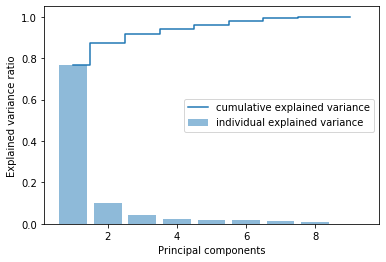

In [92]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [93]:
features

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,5,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,4,3,4,4,1
697,4,8,6,4,3,4,4,4,1


In [94]:
from sklearn.decomposition import PCA

# Separating out the features
#x = df.loc[:, features].values# Separating out the target
#y = df.loc[:,['target']].values# Standardizing the features
#x = StandardScaler().fit_transform(x)

pca=PCA(n_components=6)
X = pca.fit_transform(features)

In [95]:
X

array([[-2.93403679e+00,  2.03063564e+00,  4.48409348e-01,
         2.63853998e-01,  3.90751874e-01, -3.77004172e-01],
       [ 2.56992256e+00, -2.38427029e-01, -2.33963635e+00,
        -5.03271741e-02, -9.16137017e-01,  1.00910322e+00],
       [-3.52827120e+00,  2.58712137e-01, -6.30603200e-01,
         1.96375685e-03, -4.15711301e-02, -6.62222406e-01],
       ...,
       [ 8.97037629e+00, -4.14655565e+00,  2.17334315e+00,
        -3.03262605e-02,  7.31638809e-01, -4.17413853e-01],
       [ 5.57395185e+00, -3.16771414e+00, -6.11584822e-01,
         1.46774495e+00,  2.44880941e-01,  1.45498116e-01],
       [ 7.08934990e+00, -3.81407852e+00, -9.55625706e-01,
        -7.00332570e-02,  2.05845488e-01,  1.06240525e-01]])

In [99]:
principalDf = pd.DataFrame(pca.components_, columns = list(features))
principalDf

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.436948,0.557160,0.542040,0.194998,0.151655,0.279662,0.160761,0.199408,-0.0
1,0.885233,-0.344069,-0.297448,-0.062407,-0.050010,-0.001458,-0.021474,-0.051439,0.0
2,0.156060,0.289945,0.279138,-0.300959,-0.135426,-0.766892,-0.228264,-0.253998,-0.0
3,0.022332,0.593222,-0.713457,0.176608,0.106363,-0.217227,0.137800,0.172883,-0.0
4,-0.014677,-0.319935,0.151116,0.045246,0.120409,-0.461677,0.443142,0.669720,-0.0
5,0.016115,-0.158550,0.083753,0.896150,0.046224,-0.252988,-0.270661,-0.158448,-0.0


C:\Users\vybreddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vybreddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


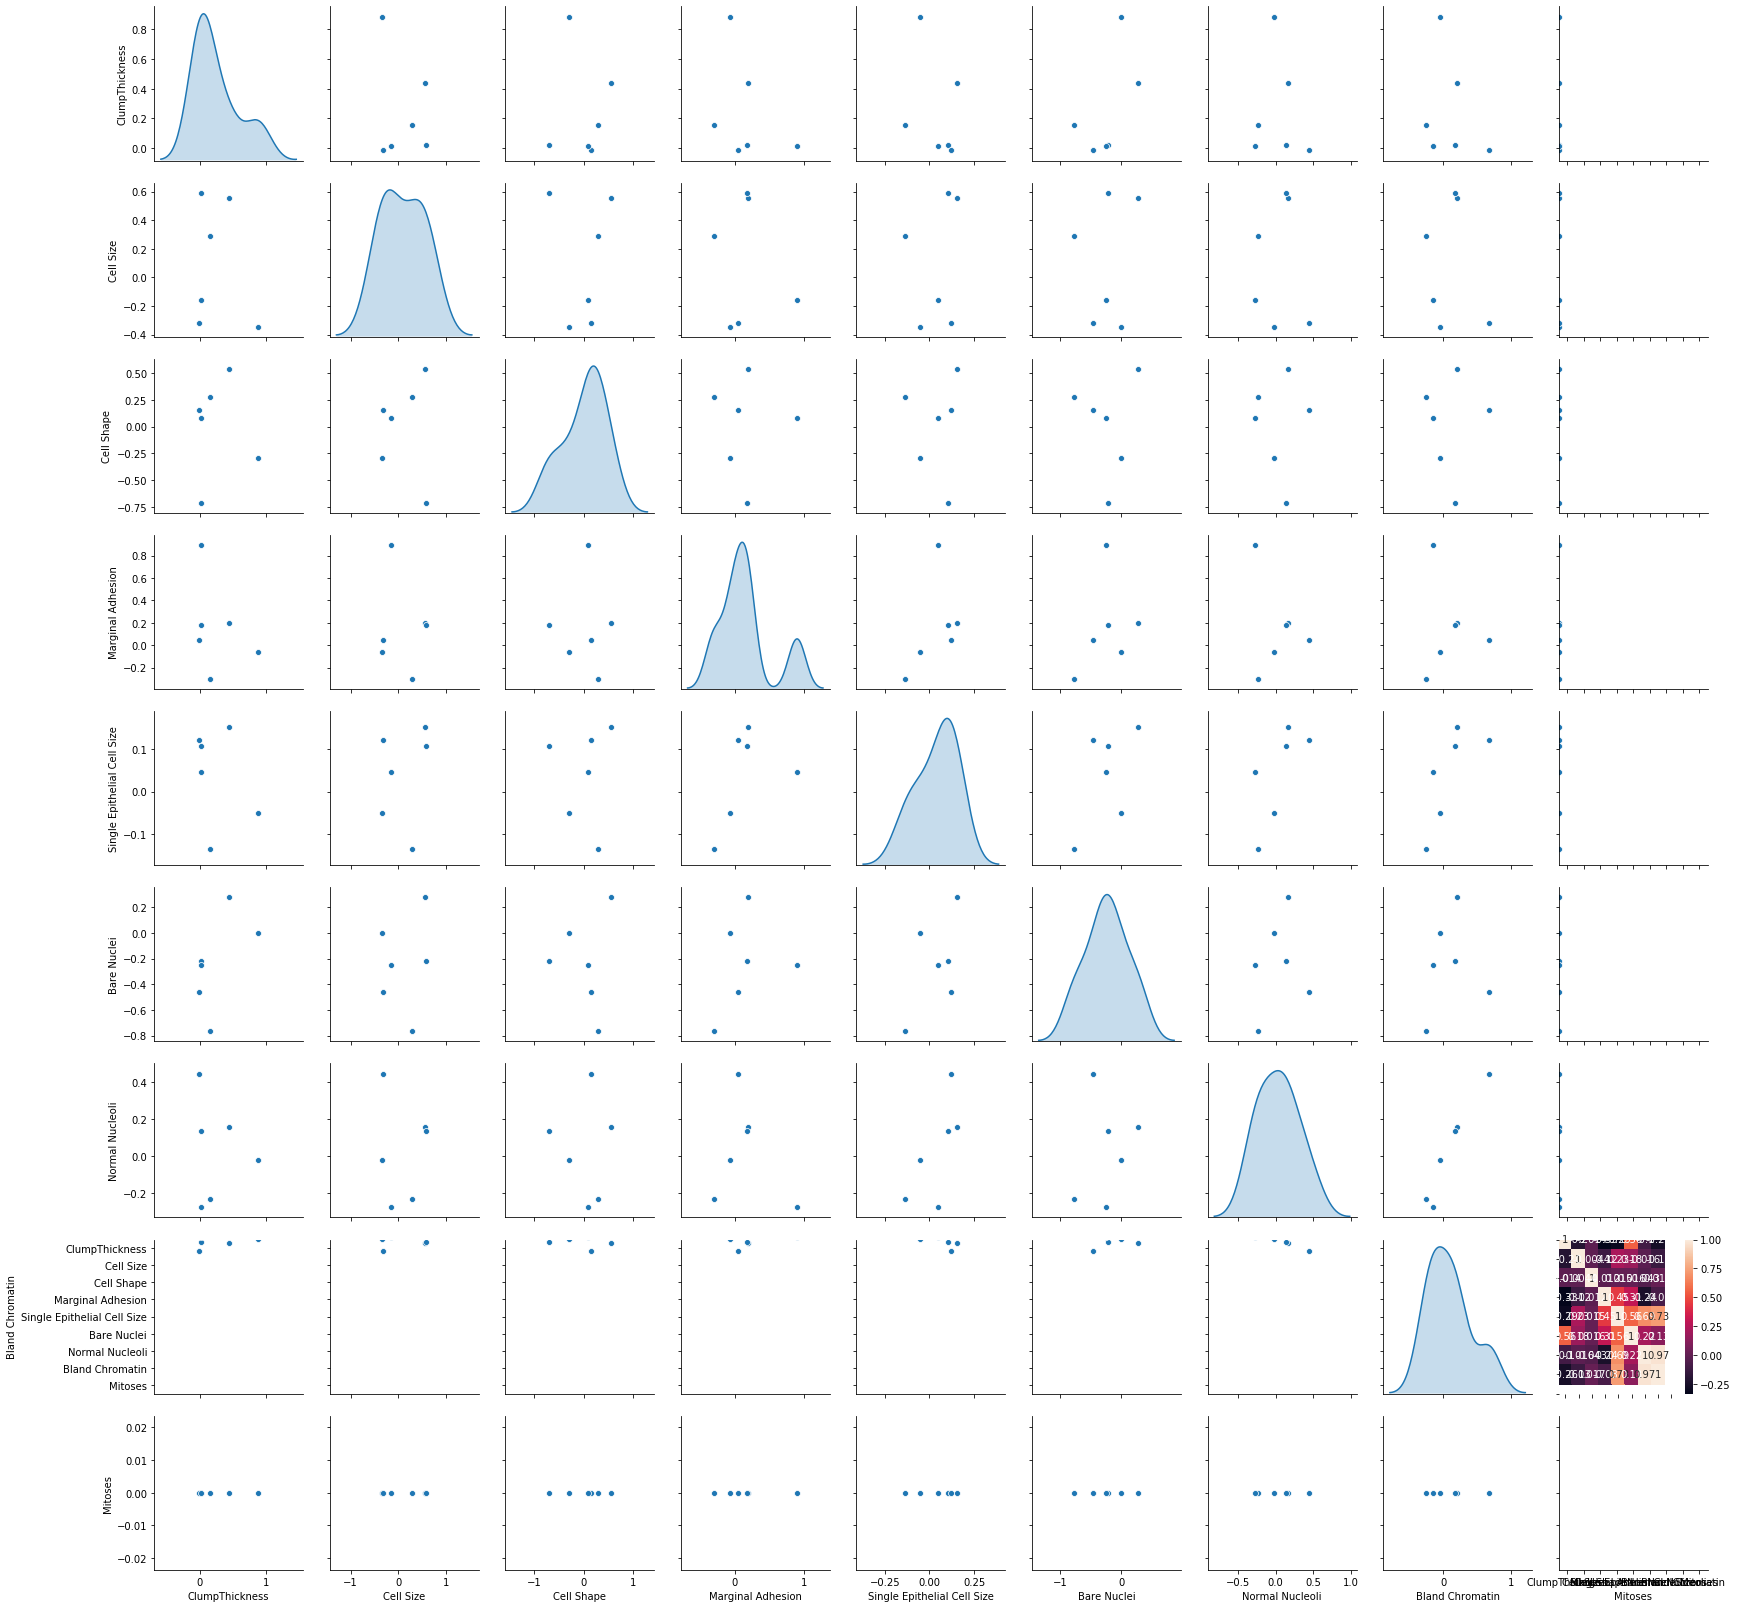

In [100]:

sns.pairplot(principalDf,diag_kind='kde')
sns.heatmap(principalDf.corr(),annot=True)
plt.show()

# Q10 Find correlation between components and features

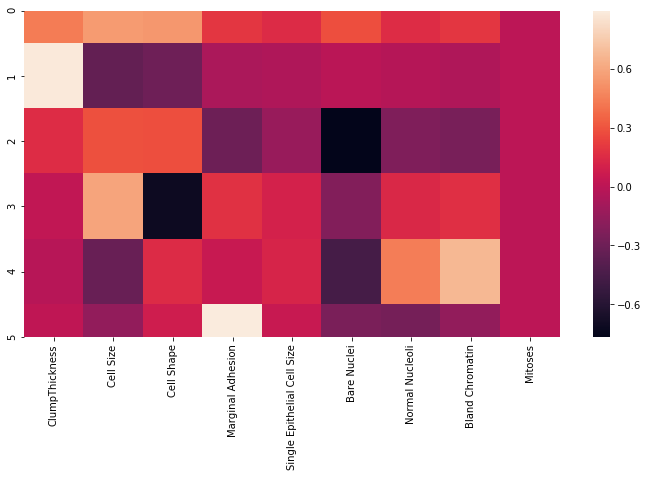

In [101]:
plt.figure(figsize=(12,6))
sns.heatmap(principalDf)
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [102]:
jokes_df=pd.read_csv("jokes.csv")
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [104]:
ratings=jokes_df.iloc[:200,1:]
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [109]:
ratings.replace(99.00,0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [110]:
ratings_diff=ratings.describe().transpose()
ratings_diff

,count,mean,std,min,25%,50%,75%,max
Joke1,200.0,0.53005,4.507771,-9.71,-0.8525,0.00,3.4125,9.27
Joke2,200.0,0.59390,4.915306,-9.95,-2.5950,0.00,4.5350,9.27
Joke3,200.0,0.23765,4.471239,-9.71,-0.7275,0.00,2.3300,9.27
Joke4,200.0,-0.70100,3.863859,-9.76,-1.6850,0.00,0.0000,8.83
Joke5,200.0,-0.03790,5.433866,-9.81,-4.2200,0.34,4.2325,9.22
...,...,...,...,...,...,...,...,...
Joke96,200.0,0.41755,2.981439,-9.51,0.0000,0.00,0.0000,9.22
Joke97,200.0,0.75500,3.243612,-9.13,0.0000,0.00,0.1100,9.17
Joke98,200.0,0.09370,3.497441,-9.66,0.0000,0.00,0.0000,9.22
Joke99,200.0,0.13500,3.265586,-9.76,0.0000,0.00,0.0000,8.98


In [114]:
ratings_diff.sort_values("mean", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')

In [117]:
ratings_diff["mean"].head(10) 

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: mean, dtype: float64

In [118]:
print("That's All Folks !!!")

That's All Folks !!!
